In [1]:
from radius import *
import matplotlib.cm as cm
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 15,
})

15min 1170C 100_000cst
15min 1150C 100_000cst
15min 1130C 100_000cst
30min 1170C 100_000cst
40min 1130C 100cst
40min 1150C 100cst
40min 1170C 100cst
40min 1190C 100cst
15min 1130C 100cst
15min 1150C 100cst
15min 1170C 100cst
15min 1190C 100cst
30min 1190C 100cst
40min 1130C 10000cst


C:\Users\ad279661\AppData\Local\Temp\ipykernel_29516\1346629940.py:69: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(prop={'size': 8})


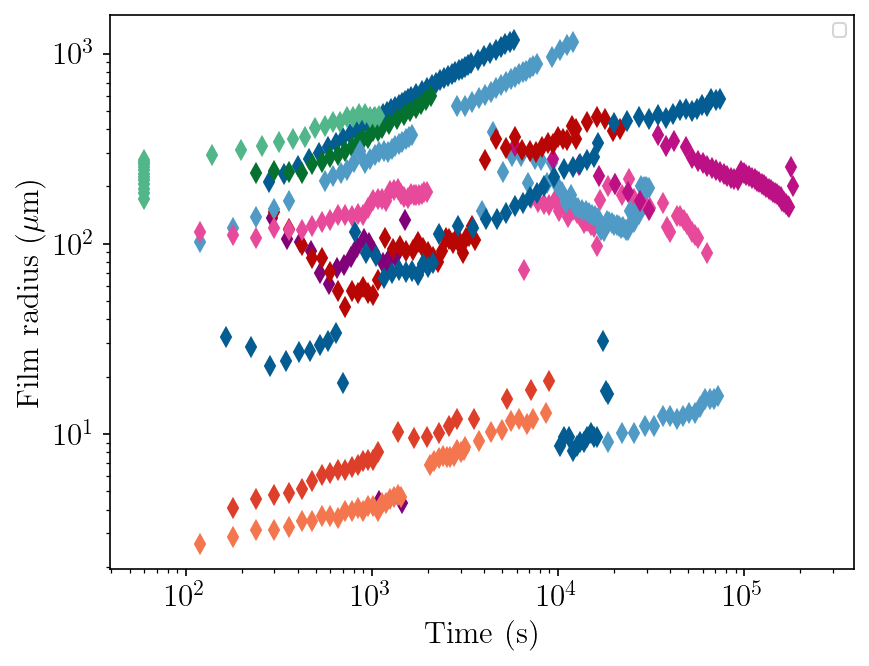

In [2]:
plt.figure(dpi=150)
times = ['50min','40min','30min','15min','8min','6min','3min','0min']
temps = ['1190C','1170C','1150C','1130C']
col = ['PuBu', 'BuGn', 'RdPu', 'OrRd']
colors = {}
for i, t in enumerate(reversed(temps)):
    cmap = plt.get_cmap(col[i])
    num_lines = len(times)
    for j, k in enumerate(times):
        exp = f'{k} {t}'
        color = cmap(1 - j / (num_lines - 1))
        colors[exp] = color
colors['ref wafer'] = 'black'
def plot_radius_film(path, r_ini, t_ini, region_switch=False, image_switch=False, mini=[False], n=-1, m=0):
    
    average, x_dist, dt, delay = timelapse(path, region_switch)
    r, t, dh, dx, da = radius_time(x_dist[m:n], average[m:n], dt, delay[m:n], r_ini=r_ini, t_ini=t_ini, mini=mini)
    #r_fit, t_fit, popt = power_law_fit(r,t)
    
    r_film = radius_film(average[m:n], x_dist[m:n], r_ini=r_ini)
    #r_film_fit, t_fit, popt_film = power_law_fit(r_film,t)

    r_tot = [item for sublist in r for item in sublist]
    r_film_tot = [item for sublist in r_film for item in sublist]
    t_tot = [item for sublist in t for item in sublist]
    exp = ' '.join(path.split(' ')[3:6]).split('/')[0]

    col = ' '.join(path.split(' ')[3:5]).split('/')[0]
    plt.plot(t_tot, np.array(r_film_tot) - np.array(r_tot), 'd', c=colors[col])

    filename = f"data_film_test/{exp}.csv"
    df = pd.DataFrame({'Film': r_film_tot, 'Time': t_tot})
    #df.to_csv(filename, index=False)

    #plt.plot(t_fit, r_film_fit, '--', c=colors[col], label=fr'{exp}: $r \approx t^{{{popt[0]:.2f}}}$')
    print(exp)    

plot_radius_film('24-06-10 silicon oil 15min 1170C 100_000cst', r_ini=755, t_ini=60*110)
#
plot_radius_film('24-06-17 silicon oil 15min 1150C 100_000cst', r_ini=312, t_ini=15*60)
#
#plot_radius_film('24-06-20 silicon oil 6min 1150C 100_00cst', r_ini=-120, t_ini=60*12)
#
plot_radius_film('24-06-13 silicon oil 15min 1130C 100_000cst/Position 3', r_ini=-25, t_ini=60*65, m=1)
#
#plot_radius_film('24-06-06 silicon oil ref wafer 100_000cst', r_ini=250, t_ini=3600)
#
plot_radius_film('24-06-24 silicone oil 30min 1170C 100_000cst', r_ini=-56, t_ini=60*15, mini=[True, True,0,0,0])

plot_radius_film('24-07-15 silicone oil 40min 1130C 100cst', r_ini=1150, t_ini=4*60+40)
#
plot_radius_film('24-07-16 silicone oil 40min 1150C 100cst', r_ini=1300, t_ini=4*60, region_switch=True, image_switch=True, n=2)

plot_radius_film('24-07-17 silicone oil 40min 1170C 100cst', r_ini=2319, t_ini=4*60+50)
#
plot_radius_film('24-07-18 silicone oil 40min 1190C 100cst', r_ini=649, t_ini=5*60, region_switch=True, image_switch=True)
plot_radius_film('24-07-29 silicone oil 15min 1130C 100cst', r_ini=1560, t_ini=60*2)

plot_radius_film('24-08-01 silicone oil 15min 1150C 100cst', r_ini=225, t_ini=60*1)

plot_radius_film('24-08-02 silicone oil 15min 1170C 100cst', r_ini=274, t_ini=60*2)

plot_radius_film('24-08-05 silicone oil 15min 1190C 100cst', r_ini=806, t_ini=60*2)

plot_radius_film('24-08-07 silicone oil 30min 1190C 100cst', r_ini=321, t_ini=60*3)

plot_radius_film('24-09-16 silicone oil 40min 1130C 10000cst', r_ini=852, t_ini=60*2 + 45)

plt.legend(prop={'size': 8})
plt.xlabel('Time (s)')
plt.ylabel(r'Film radius ($\mu$m)')
#plt.title('Film width over time')
plt.xscale('log')
plt.yscale('log')
#plt.savefig('figures/droplet_film.pdf', dpi=200)
plt.show()

In [200]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 14,
})
path = 'data_film/'
edge = {
    "100_000cst": 'black',
    "100cst": None,
    "10000cst": None
}

marks = {'1130C': ".", '1150C': "v", '1170C': "s", '1190C': "*"}
times = ['50min','40min','30min','15min','8min','6min','3min','0min']
temps = ['1190C','1170C','1150C','1130C']
col = ['PuBu', 'BuGn', 'RdPu', 'OrRd']
def power_law(t, a, a0):
        return a0 * (t ** a)

def power_law_fit(r,t, a=0.1, a0=100):
    '''
    Calculate a fit of the radius over time
    
    r (lists, float): radius data of timelapses
    t (lists, float): times data of timelapses

    return: r_fit (lists, float): all the radius in one single list
            t_fit (lists, float): all the times in one single list
            popt (float): fitted power indice
    '''
    popt, pcov = curve_fit(power_law, t, r, p0 = (a, a0), maxfev=800)
    r_fitted = power_law(t, *popt)
    return r_fitted, t, popt

colors = {}
for i, t in enumerate(reversed(temps)):
    cmap = plt.get_cmap(col[i])
    num_lines = len(times)
    for j, k in enumerate(times):
        exp = f'{k} {t}'
        color = cmap(1 - j / (num_lines - 1))
        colors[exp] = color
colors['ref wafer'] = 'black'
film = {}
h = np.load('height_dict.npy',allow_pickle='TRUE').item()
area = np.load('area_dict.npy',allow_pickle='TRUE').item()
height = np.load('height_dict.npy',allow_pickle='TRUE').item()

density = np.load('density_dict.npy',allow_pickle='TRUE').item()
height['Twafer_tref'] = 0
density['Twafer_tref'] = 0
height['Twafer_t0min'] = 0
density['Twafer_t0min'] = 0

plt.figure(dpi=150)
for file in os.listdir(path):
    try:
        df = pd.read_csv(path + file)
        dr = pd.read_csv('data/' + file)
        
        r = df['Film']

        t = df['Time']

        for i, dt in enumerate(t):
            try:
                selected_time = dt  
                radius_value = dr.loc[dr['Time'] == selected_time, 'Radius'].values[0]
                position = dr.loc[dr['Time'] == selected_time].index[0]
                
                r[i] -= dr['Radius'][position]
            except: None
        T = file.split(' ')[1]
        k = file.split(' ')[0]
        name = f'T{T}_t{k}'
        h = height[name]
        dens = density[name]
        exp = file.split('.csv')[0]
        col = ' '.join(file.split(' ')[0:2])
        visc = float(''.join(file.split(' ')[2].split('cst')[0].split('_')))*1e-6
        tens=25*10**-3
        rg = 1 + (area[name]/100)
        print(h)
        D = tens*(rg-1)*h*1e-9/visc
        r_fit, t_fit, popt = power_law_fit(r,t)
        face = colors[col]

        exp_name = fr'{dens:.2f} $/\mu m^2$ | {h:.1f} nm | 100cSt'
        face = colors[col]

        if file.split(' ')[-1].split('.csv')[0] == '100_000cst':
            exp_name = fr'{dens:.2f} $/\mu m^2$ | {h:.1f} nm | 100,000cSt'
            face = 'none'
        print(file.split(' ')[-1].split('.csv')[0])
        if file.split(' ')[-1].split('.csv')[0] == '10000cst':
            exp_name = fr'{dens:.2f} $/\mu m^2$ | {h:.1f} nm | 10,000cSt'
            face = 'none'

        if k =='0min':
            exp_name = 'smooth wafer | 100cSt'
            face = 'none'
            colors[col] = 'black'
        if k == 'ref':
            exp_name = 'smooth wafer | 100,000cSt'
            face = 'none'
            zord=1

        print(exp)
        #
        if True:
            film[f'{name}'] = popt[0]
            plt.scatter(t, r, label = fr"{exp_name}",
                marker=marks[file.split(' ')[1].split('.csv')[0]], facecolors=face, edgecolors=colors[col], linewidths=1, s=100)
        #plt.plot(dt, dr, '--', c=colors[col])
        plt.plot(0,0)
    except FileNotFoundError:
        print(f"Error: File '{file}' not found.")
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file}' is empty.")
    except Exception as e:
        print(f"An error occurred: {e}")

#plt.legend(prop={'size': 8})
plt.xlabel('Time (s)')
plt.ylabel(r'Film Width ($\mu m$)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True, title=r'density | height | viscosity')
#plt.title('Radius of the droplets over time')
plt.xscale('log')
plt.yscale('log')
#plt.savefig('../figures/droplet_film.png', dpi=300, bbox_inches='tight')
plt.show()
print(film)

74.07565774058577
100cst
15min 1130C 100cst
16.597073782051282
100cst
15min 1190C 100cst
Error: File '30min 1170C 100_000cst.csv' not found.
18.948618045112784
100cst
30min 1190C 100cst
68.0214552293578
100cst
40min 1130C 100cst
45.76507909502263
100cst
40min 1150C 100cst
Error: File '40min 1170C 100cst.csv' not found.


{'T1130C_t15min': 0.5475608849214465, 'T1190C_t15min': -1.9509873486227514, 'T1190C_t30min': 0.41094515607679644, 'T1130C_t40min': 0.559265703033725, 'T1150C_t40min': 0.5432136644080156}


T1130C_t15min
0.032220168199999996
74.07565774058577
100cst
T1190C_t15min
0.00046139142799999375
16.597073782051282
100cst
Error: File '30min 1170C 100_000cst.csv' not found.
T1190C_t30min
0.0005866927349999941
18.948618045112784
100cst
T1130C_t40min
0.09526595051600002
68.0214552293578
100cst
T1150C_t40min
0.05581351367299999
45.76507909502263
100cst
Error: File '40min 1170C 100cst.csv' not found.


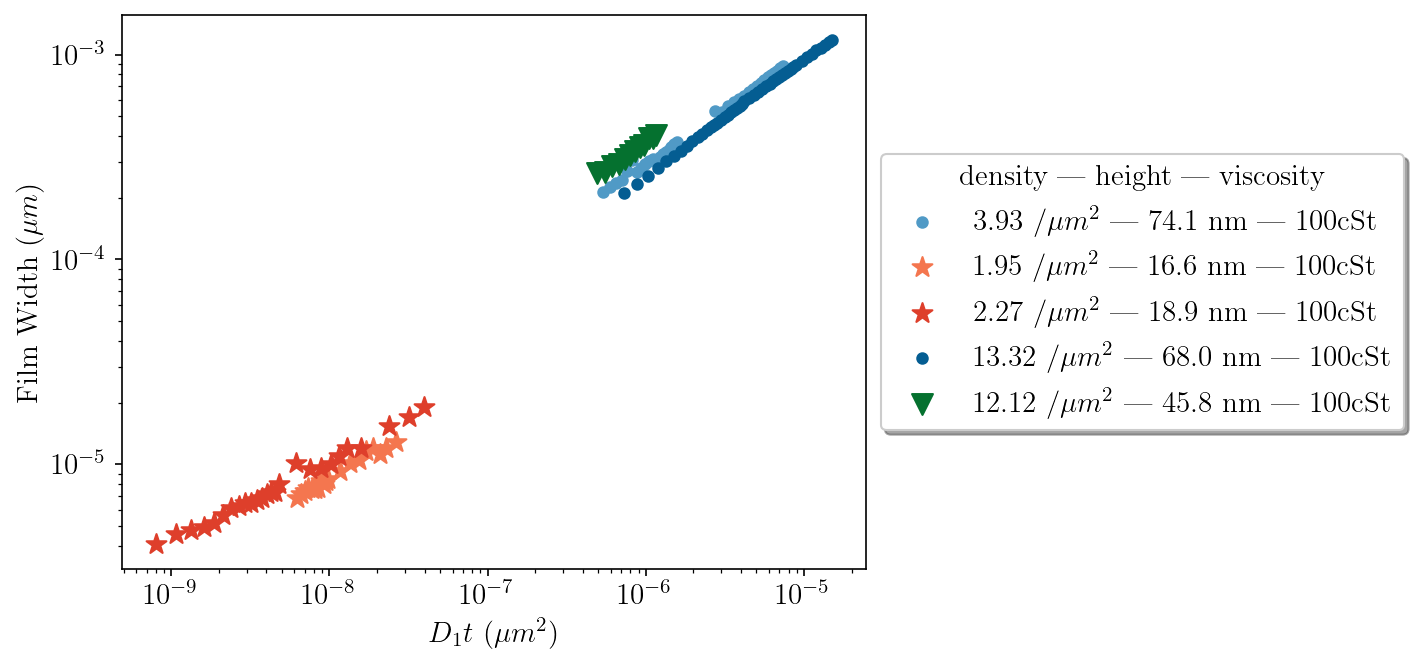

{'T1130C_t15min': 0.5475608849214465, 'T1190C_t15min': -1.9509873486227514, 'T1190C_t30min': 0.41094515607679644, 'T1130C_t40min': 0.559265703033725, 'T1150C_t40min': 0.5432136644080156}


In [198]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 14,
})
path = 'data_film/'
edge = {
    "100_000cst": 'black',
    "100cst": None,
    "10000cst": None
}

marks = {'1130C': ".", '1150C': "v", '1170C': "s", '1190C': "*"}
times = ['50min','40min','30min','15min','8min','6min','3min','0min']
temps = ['1190C','1170C','1150C','1130C']
col = ['PuBu', 'BuGn', 'RdPu', 'OrRd']
def power_law(t, a, a0):
        return a0 * (t ** a)

def power_law_fit(r,t, a=0.1, a0=100):
    '''
    Calculate a fit of the radius over time
    
    r (lists, float): radius data of timelapses
    t (lists, float): times data of timelapses

    return: r_fit (lists, float): all the radius in one single list
            t_fit (lists, float): all the times in one single list
            popt (float): fitted power indice
    '''
    popt, pcov = curve_fit(power_law, t, r, p0 = (a, a0), maxfev=800)
    r_fitted = power_law(t, *popt)
    return r_fitted, t, popt

colors = {}
for i, t in enumerate(reversed(temps)):
    cmap = plt.get_cmap(col[i])
    num_lines = len(times)
    for j, k in enumerate(times):
        exp = f'{k} {t}'
        color = cmap(1 - j / (num_lines - 1))
        colors[exp] = color
colors['ref wafer'] = 'black'
film = {}
area = np.load('area.npy',allow_pickle='TRUE').item()
height = np.load('height_dict.npy',allow_pickle='TRUE').item()

density = np.load('density_dict.npy',allow_pickle='TRUE').item()
height['Twafer_tref'] = 0
density['Twafer_tref'] = 0
height['Twafer_t0min'] = 0
density['Twafer_t0min'] = 0


plt.figure(dpi=150)
for file in os.listdir(path):
    try:
        df = pd.read_csv(path + file)
        dr = pd.read_csv('data/' + file)
        
        r = df['Film']

        t = df['Time']

        for i, dt in enumerate(t):
            try:
                selected_time = dt  
                radius_value = dr.loc[dr['Time'] == selected_time, 'Radius'].values[0]
                position = dr.loc[dr['Time'] == selected_time].index[0]
                
                r[i] -= dr['Radius'][position]
            except: None
        T = file.split(' ')[1]
        k = file.split(' ')[0]
        name = f'T{T}_t{k}'
        h = height[name]
        print(name)
        exp = file.split('.csv')[0]
        col = ' '.join(file.split(' ')[0:2])
        visc = float(''.join(file.split(' ')[2].split('cst')[0].split('_')))*1e-6 * 1000
        tens=20*10**-3
        rg = (np.sum(area[name][1]) - np.sum(area[name][0]))/(100*1e-12)
        print(rg)
        D = 2*tens*rg*h*1e-9/visc
        print(h)
        r_fit, t_fit, popt = power_law_fit(r,t)
        face = colors[col]
        dens = density[name]
        

        exp_name = fr'{dens:.2f} $/\mu m^2$ | {h:.1f} nm | 100cSt'
        face = colors[col]

        if file.split(' ')[-1].split('.csv')[0] == '100_000cst':
            exp_name = fr'{dens:.2f} $/\mu m^2$ | {h:.1f} nm | 100,000cSt'
            face = 'none'
        print(file.split(' ')[-1].split('.csv')[0])
        if file.split(' ')[-1].split('.csv')[0] == '10000cst':
            exp_name = fr'{dens:.2f} $/\mu m^2$ | {h:.1f} nm | 10,000cSt'
            face = 'none'

        if k =='0min':
            exp_name = 'smooth wafer | 100cSt'
            face = 'none'
            colors[col] = 'black'
        if k == 'ref':
            exp_name = 'smooth wafer | 100,000cSt'
            face = 'none'
            zord=1
        #print(exp)
        #
        if True:
            film[f'{name}'] = popt[0]
            plt.scatter((D*t), r*1e-6, label = fr"{exp_name}",
                marker=marks[file.split(' ')[1].split('.csv')[0]], facecolors=face, edgecolors=colors[col], linewidths=1, s=100)
        #plt.plot(dt, dr, '--', c=colors[col])
        plt.plot(0,0)
    except FileNotFoundError:
        print(f"Error: File '{file}' not found.")
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file}' is empty.")
    except Exception as e:
        print(f"An error occurred: {e}")
#plt.plot(np.logspace(-25,-19, 100), 7e12 * np.logspace(-25,-19, 100)**(1/2), label=r'$W_f \propto t^{1/2}$')
#plt.legend(prop={'size': 8})
plt.xlabel(r'$D_1 t$ ($\mu m ^2$)')
plt.ylabel(r'Film Width ($\mu m$)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True, title=r'density | height | viscosity')
#plt.title('Radius of the droplets over time')
plt.xscale('log')
plt.yscale('log')
plt.savefig('../figures/droplet_film_master.png', dpi=300, bbox_inches='tight')
plt.show()
print(film)

In [157]:
df = pd.read_csv('data_film/40min 1130C 10000cst.csv')
dr = pd.read_csv('data/40min 1130C 10000cst.csv')
r = df['Film']
t = df['Time']
for i, dt in enumerate(t):
            try:
                selected_time = dt  
                radius_value = dr.loc[dr['Time'] == selected_time, 'Radius'].values[0]
                position = dr.loc[dr['Time'] == selected_time].index[0]
                
                r[i] -= dr['Radius'][position]
            except: None

plt.figure()
plt.scatter (t, r)
r_fit, t_fit, popt = power_law_fit(r[10:],t[10:], a=1.8, a0=10)
plt.plot(t_fit, r_fit, '--', c='r', label=fr'{popt[0]}')
r_fit, t_fit, popt = power_law_fit(r[:10],t[:10], a=0.5, a0=10)
plt.plot(t_fit, r_fit, '-', c='r', label=fr'{popt[0]}')
plt.plot(3*np.logspace(2,3, 10), 1e-3*np.logspace(2,3, 10)**1.8, label='1.8')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

15min 1130C 100cst.csv
T1130C_t15min
100cst
15min 1150C 100_000cst.csv
T1150C_t15min
100_000cst
15min 1170C 100_000cst.csv
T1170C_t15min
100_000cst
15min 1190C 100cst.csv
T1190C_t15min
100cst
30min 1190C 100cst.csv
T1190C_t30min
100cst
40min 1130C 10000cst.csv
T1130C_t40min
10000cst
40min 1130C 100cst.csv
T1130C_t40min
100cst
40min 1150C 100cst.csv
T1150C_t40min
100cst
40min 1190C 100cst.csv
T1190C_t40min
100cst
6min 1150C 100_000cst.csv
T1150C_t6min
100_000cst
ref wafer 100_000cst.csv
ref wafer 100_000cst
2.1034093789138907e-11
Twafer_tref
An error occurred: 'Twafer_tref'


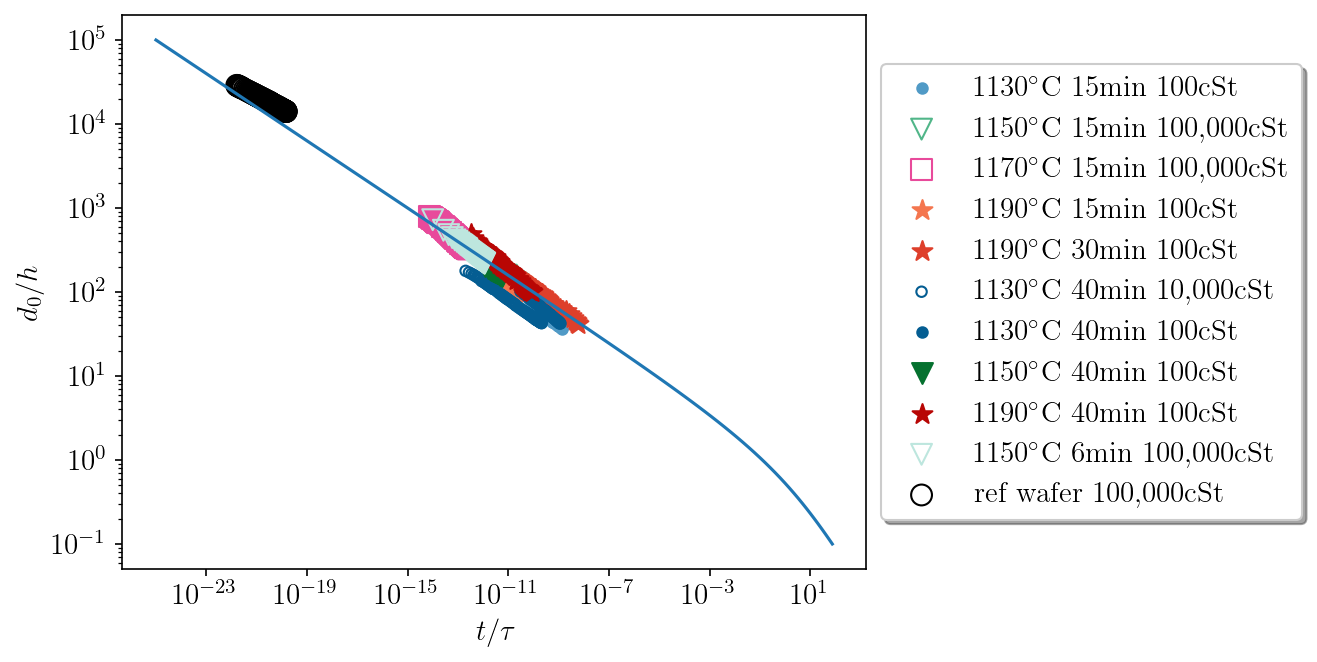

{}


In [197]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 14,
})
path = 'data/'
edge = {
    "100_000cst": 'black',
    "100cst": None,
    "10000cst": None
}

marks = {'1130C': ".", '1150C': "v", '1170C': "s", '1190C': "*", 'wafer': "o"}
times = ['50min','40min','30min','15min','8min','6min','3min','0min']
temps = ['1190C','1170C','1150C','1130C']
col = ['PuBu', 'BuGn', 'RdPu', 'OrRd']
def power_law(t, a, a0):
        return a0 * (t ** a)

def power_law_fit(r,t, a=0.1, a0=100):
    '''
    Calculate a fit of the radius over time
    
    r (lists, float): radius data of timelapses
    t (lists, float): times data of timelapses

    return: r_fit (lists, float): all the radius in one single list
            t_fit (lists, float): all the times in one single list
            popt (float): fitted power indice
    '''
    popt, pcov = curve_fit(power_law, t, r, p0 = (a, a0), maxfev=800)
    r_fitted = power_law(t, *popt)
    return r_fitted, t, popt

colors = {}
for i, t in enumerate(reversed(temps)):
    cmap = plt.get_cmap(col[i])
    num_lines = len(times)
    for j, k in enumerate(times):
        exp = f'{k} {t}'
        color = cmap(1 - j / (num_lines - 1))
        colors[exp] = color
colors['ref wafer'] = 'black'
vol = {'15min 1170C 100_000cst': 0.02896458666819679, '15min 1150C 100_000cst': 0.0054753471962565, '6min 1150C 100_000cst': 0.03672917652720812, '15min 1130C 100_000cst': 0.02234160669960495, 'ref wafer 100_000cst': 0.021034093789138907, '40min 1130C 100cst': 0.01638716662367604, '40min 1150C 100cst': 0.02821391656759003, '40min 1170C 100cst': 0.02323518336203401, '40min 1190C 100cst': 0.006746175280507629, '15min 1130C 100cst': 0.04797280199472085, '15min 1150C 100cst': 0.0007906401351394383, '15min 1170C 100cst': 0.0011087578072419412, '15min 1190C 100cst': 0.0033312012342024545, '30min 1190C 100cst': 0.0006707300315414209, '0min 1190C 100cst': 0.004838016782612242, '40min 1130C 10000cst': 0.015453619926714308, 'ref wafer 100cst': 0.007753639164618823}
film = {}
h = np.load('height_dict.npy',allow_pickle='TRUE').item()
area = np.load('area.npy',allow_pickle='TRUE').item()
plt.figure(dpi=150)
for file in os.listdir(path):
    try:
        print(file)
        dr = pd.read_csv(path + file)
        r = dr['Radius']

        t = dr['Time']

        T = file.split(' ')[1]
        k = file.split(' ')[0]
        #tracer les courbes ref avec un e de 1 nm
        if k == 'ref':
            exp_name = 'ref wafer 100,000cSt'
            exp = file.split('.csv')[0]
            print(exp)
            e = 1
            alpha=10**2
            V =  vol[exp] * 1e-9
            print(V)
            tau =  (visc * V**2)/(tens*(e*1e-9)**5) /alpha
            d0 = 2 * (V/(np.pi*(np.array(r)*1e-6)**2))
            plt.scatter(t/tau, d0/(e*1e-9), label = fr"{exp_name}",
                marker="o", facecolors='none', edgecolors='black', linewidths=1, s=100, zorder=1)
        name = f'T{T}_t{k}'
        print(name)
        exp = file.split('.csv')[0]
        col = ' '.join(file.split(' ')[0:2])
        visc = float(''.join(file.split(' ')[2].split('cst')[0].split('_')))*1e-6 * 1000
        tens=20*10**-3
        rg = (np.sum(area[name][1]) - np.sum(area[name][0]))/(100*1e-12)

        D = 2*tens*rg*h[name]*1e-9/visc

        V =  vol[exp] * 1e-9
        d0 = 2 * (V/(np.pi*(np.array(r)*1e-6)**2))

        alpha=10**2
        tau =  (visc * V**2)/(tens*(h[name]*1e-9)**5) /alpha

        exp_name = fr'{T.split('C')[0]}$^\circ$C {k} 100cSt'
        face = colors[col]
        if file.split(' ')[-1].split('.csv')[0] == '100_000cst':
            exp_name = fr'{T.split('C')[0]}$^\circ$C {k} 100,000cSt'
            face = 'none'
        if file.split(' ')[-1].split('.csv')[0] == '10000cst':
            exp_name = fr'{T.split('C')[0]}$^\circ$C {k} 10,000cSt'
            face = 'none'
        print(file.split(' ')[-1].split('.csv')[0])
        if k =='0min':
            exp_name = 'ref wafer 100cSt'
            face = 'none'
            colors[col] = 'black'
        if k == 'ref':
            exp_name = 'ref wafer 100,000cSt'
            face = 'none'
        plt.scatter(t/tau, d0/(h[name]*1e-9), label = fr"{exp_name}",
                marker=marks[file.split(' ')[1].split('.csv')[0]], facecolors=face, edgecolors=colors[col], linewidths=1, s=100)
        plt.plot(0,0)
    except FileNotFoundError:
        print(f"Error: File '{file}' not found.")
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file}' is empty.")
    except Exception as e:
        print(f"An error occurred: {e}")
#plt.plot(np.logspace(-15,-8, 100), 1e-1 * np.logspace(-15,-8, 100)**(-0.2))
#plt.plot(np.logspace(-12,-8, 100), 1e-4 * np.logspace(-12,-8, 100)**(-0.5))
#plt.legend(prop={'size': 8})

y = np.logspace(-1, 5, 100)
x = (y**2) * (1+y)**3
plt.plot(1/x ,y)
plt.xlabel(r'$t/\tau$')
plt.ylabel(r'$d_0 / h$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)
#plt.title('Radius of the droplets over time')
plt.xscale('log')
plt.yscale('log')
plt.savefig('../figures/droplet_film_master.png', dpi=300, bbox_inches='tight')
plt.show()
print(film)

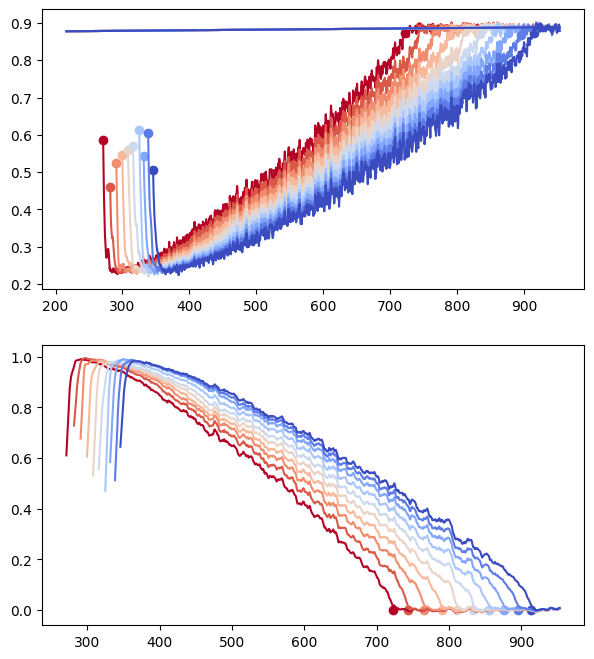

[722.0521614457824, 742.9185632692927, 765.9435583848901, 789.6880845978501, 811.2740175187229, 833.8193252360787, 855.4052581569514, 875.5521288830993, 895.4591559101262, 913.9271207424284]


In [ ]:
j=1
coord = x_dist[j]
 
fig, axs = plt.subplots(2, figsize=(7,8))
cmap = plt.get_cmap('coolwarm')
num_lines = len(average[j])
rr = []
r_film = []
pct_b = 30
pct_f = 2
lin_bg = np.polyfit(coord[-int(len(coord)*pct_b/100):], average[j][0][-int(len(coord)*pct_b/100):],1)
for i, data in enumerate(average[j]):
    color = cmap(1-i/ (num_lines -1))
    #dy = np.where([data < np.mean(data)][-1] == True)[-1][-1]
    z = data
    peaks, _ = find_peaks(z, prominence=np.std(z), width=0.1)
    peaks = outliers(peaks)
    dr = peaks[-1]+(peaks[-1]-peaks[-2])//2
    zz = z - (lin_bg[0]*coord+lin_bg[1])
    int_f = zz[dr:]
    int_f = int_f/np.min(int_f)
    sdf = savgol_filter(int_f, 30, 1)
    bf = np.argwhere(sdf<pct_f/100)[0]
    r_film.append(coord[dr:][bf][0])
    rr.append(coord[dr])
    axs[0].plot(coord[dr:], data[dr:], color=color)
    axs[0].plot(coord, (lin_bg[0]*coord+lin_bg[1]), color=color)
    axs[0].scatter(coord[dr], data[dr], color=color)
    axs[0].scatter(coord[dr:][bf], data[dr:][bf], color=color)
    axs[1].scatter(coord[dr:][bf], data[dr:][bf]*0, color=color)
    axs[1].plot(coord[dr:], sdf, color=color)
plt.show()
print(r_film)